# Machine learning- based prediction of Coronary Artery Disease(CAD)
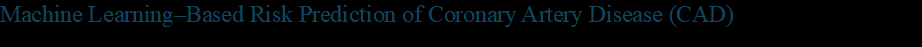

## Project Objective
The aim of this project is to create a machine learning-based prediction that determines whether a patient has a coronary artery disease (CAD) based on a selection of clinical and lifestyle factors.
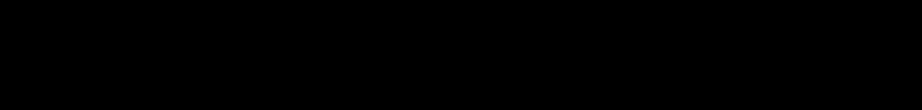
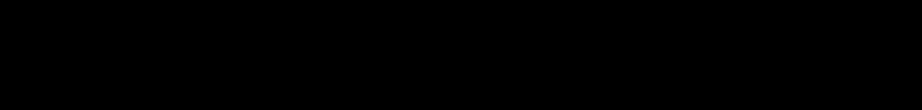

## Data Requirements


### Data Characteristics
- **Predictors (13 features):**
  - Age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting ECG, max heart rate, exercise-induced angina, ST depression, slope, number of major vessels (ca), thalassemia.
- **Target (1 feature):**
  - **target**: 0 = no disease, 1 = disease present.

### Requirements

- **Data Source**: UCI Machine Learning Repository (Heart Disease dataset).
- **Format**: Tabular data (CSV), one row per patient.
- **Instances**: 303 records (patients).
- **Features**: 13 clinical and demographic predictors + 1 target variable.
- **Target Variable**: Binary outcome indicating presence of CAD.

### Data Quality Considerations
- Contains both **numerical** and **categorical** features.
- Some features may contain missing values (especially ca and thal).
- Preprocessing steps required:
  - Handle missing values.
  - Encode categorical features.
  - Scale numerical features if required by the model.

### Data legality and Ethics
The dataset is publicly available and anonymized, containing no personal information of patients
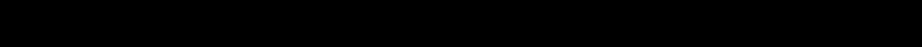
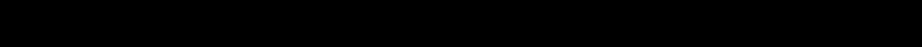

### Data Diversity
The dataset will include records for both genders and cover a range of ages and clinical values. Duplicate entries wil be removed and missing values will be handled accordingly.

### Version Control
I will maintain version control of my data pipeline. intermediate datasets will be saved after cleaning, preprocessing and feature engineering. I will consider using Git with DVC (Data Version Control), allowing different versions of the dataset to bes stored and retrieved when needed.

### Iterative Process
I will continuously monitor the model's performance and gather feedback for improvement. If the model is not performing good, I will consider updating the data sources. I will keep track of the validity of the data and update when necessary.

## Data Dictionary – UCI Heart Disease (Cleveland Cohort)

This dataset contains 303 patient records with 14 attributes commonly used in heart disease prediction research.
Missing values are represented as `-9.0` (and sometimes `"?"` in processed versions).
The target variable (`num`) is multi-class (0–4) but is often simplified to binary (0 = no disease, 1 = disease present).

---
| Data Element Name      | Data Type            | Units            | Range / Categories *(after mapping)*                                                                                    | Description                                        | Source              | Quality Standards                           | Notes                                                                                                     |
| ---------------------- | -------------------- | ---------------- | ----------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------- | ------------------- | ------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| `age`                  | Numerical            | Years            | 29 – 77                                                                                                                 | Age of the patient                                 | Patient record      | Must be integer, no missing values          | CAD risk increases with age; younger patients are underrepresented                                        |
| `sex`                  | Categorical (binary) | N/A              | 0 = female, 1 = male                                                                                                    | Biological sex                                     | Patient record      | Values restricted to 0 or 1                 | Majority of cases are male, which may bias the model                                                      |
| `cp` (chest pain type) | Categorical          | N/A              | 0 = typical angina *(was 1)*, 1 = atypical angina *(was 2)*, 2 = non-anginal pain *(was 3)*, 3 = asymptomatic *(was 4)* | Type of chest pain                                 | Clinical exam       | Values restricted to 0–3                    | Asymptomatic chest pain (3) is often strongly associated with CAD                                         |
| `trestbps`             | Numerical            | mm Hg            | 94 – 200                                                                                                                | Resting blood pressure (on admission)              | Clinical exam       | Must be integer, positive                   | Hypertension is a known CAD risk factor; some outliers may exist                                          |
| `chol`                 | Numerical            | mg/dl            | 126 – 564                                                                                                               | Serum cholesterol level                            | Lab test            | Must be integer, positive                   | Very high values may indicate measurement error; total cholesterol alone is not always a strong predictor |
| `fbs`                  | Categorical (binary) | mg/dl            | 0 = ≤120, 1 = >120                                                                                                      | Fasting blood sugar                                | Lab test            | Values restricted to 0 or 1                 | Reflects possible diabetes; relatively weak predictor on its own                                          |
| `restecg`              | Categorical          | N/A              | 0 = normal *(was 0)*, 1 = ST–T abnormality *(was 1)*, 2 = LV hypertrophy *(was 2)*                                      | Resting ECG results                                | ECG test            | Values restricted to 0–2                    | Abnormal ECG can be linked to CAD, but sensitivity is limited                                             |
| `thalach`              | Numerical            | bpm              | 71 – 202                                                                                                                | Maximum heart rate achieved                        | Exercise test       | Must be integer, plausible biological range | Lower peak values may suggest reduced cardiac function                                                    |
| `exang`                | Categorical (binary) | N/A              | 0 = no, 1 = yes                                                                                                         | Exercise-induced angina                            | Exercise test       | Values restricted to 0 or 1                 | Strong predictor; presence of angina under exercise is significant                                        |
| `oldpeak`              | Numerical            | Depression units | 0.0 – 6.2                                                                                                               | ST depression induced by exercise relative to rest | ECG stress test     | Float, one decimal precision                | Higher values indicate abnormal stress response                                                           |
| `slope`                | Categorical          | N/A              | 0 = upsloping *(was 1)*, 1 = flat *(was 2)*, 2 = downsloping *(was 3)*                                                  | Slope of peak exercise ST segment                  | ECG stress test     | Values restricted to 0–2                    | Flat or downsloping patterns are often associated with CAD                                                |
| `ca`                   | Numerical (discrete) | Count of vessels | 0 – 3 (missing = -9.0)                                                                                                  | Number of major vessels colored by fluoroscopy     | Imaging test        | Missing values must be handled              | Higher counts strongly indicate CAD; missing values require imputation                                    |
| `thal`                 | Categorical          | N/A              | 0 = normal *(was 3)*, 1 = fixed defect *(was 6)*, 2 = reversible defect *(was 7)*, missing = -9.0                       | Thalassemia test result                            | Nuclear stress test | Missing values must be handled              | Abnormal thal results (1, 2) are highly correlated with CAD                                               |


### Target (Output Variable)

| Data Element Name                  | Data Type | Units | Range / Categories | Description | Source | Quality Standards | Notes |
|------------------------------------|-----------|-------|--------------------|-------------|--------|-------------------|-------|
| `target` (diagnosis of heart disease) | Categorical (ordinal) | N/A | 0 = no disease, 1–4 = increasing disease severity | Coronary artery disease diagnosis (angiographic) | Clinical diagnosis | Must be integer 0–4 | Typically binarized: 0 = no disease, 1 = disease present (1–4) |



## Data Provisioning


In [55]:
import pandas as pd
import numpy as np

# assigning column names

cols = ["age","sex","cp","trestbps","chol","fbs","restecg",
        "thalach","exang","oldpeak","slope","ca","thal","target"]

df = pd.read_csv("processed.cleveland.data", header=None, names=cols, na_values=["?", -9.0])

# ensuring all columns are numbers
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Map categorical codes to 0-based
df['cp']    = df['cp'].map({1:0, 2:1, 3:2, 4:3})
df['restecg'] = df['restecg'].map({0:0, 1:1, 2:2})
df['slope'] = df['slope'].map({1:0, 2:1, 3:2})
df['thal']  = df['thal'].map({3:0, 6:1, 7:2})

# giving target binary values
df['target'] = (df['target'] > 0).astype(int)

# quick sanity checks
print("Unique cp:", df['cp'].unique())
print("Unique slope:", df['slope'].unique())
print("Unique thal:", df['thal'].unique())


print(df.shape)
print(df.info())
display(df.head())


Unique cp: [0 3 2 1]
Unique slope: [2 1 0]
Unique thal: [ 1.  0.  2. nan]
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int32  
dtypes: float64(10), int32(1), int64(3)
memory usage: 32.1 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,0,145.0,233.0,1.0,2,150.0,0.0,2.3,2,0.0,1.0,0
1,67.0,1.0,3,160.0,286.0,0.0,2,108.0,1.0,1.5,1,3.0,0.0,1
2,67.0,1.0,3,120.0,229.0,0.0,2,129.0,1.0,2.6,1,2.0,2.0,1
3,37.0,1.0,2,130.0,250.0,0.0,0,187.0,0.0,3.5,2,0.0,0.0,0
4,41.0,0.0,1,130.0,204.0,0.0,2,172.0,0.0,1.4,0,0.0,0.0,0


In [57]:
ranges = df.apply(pd.to_numeric, errors="coerce").agg(["min","max"]).T
print(ranges)

            min    max
age        29.0   77.0
sex         0.0    1.0
cp          0.0    3.0
trestbps   94.0  200.0
chol      126.0  564.0
fbs         0.0    1.0
restecg     0.0    2.0
thalach    71.0  202.0
exang       0.0    1.0
oldpeak     0.0    6.2
slope       0.0    2.0
ca          0.0    3.0
thal        0.0    2.0
target      0.0    1.0


## Handling missing values


In [60]:
print(df.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [61]:
df["ca"] = df["ca"].fillna(df["ca"].mode()[0])
df["thal"] = df["thal"].fillna(df["thal"].mode()[0])
print(df.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Count of positive and negative samples

In [64]:
df.target.value_counts()

target
0    164
1    139
Name: count, dtype: int64

### Distribution of CAD visualised

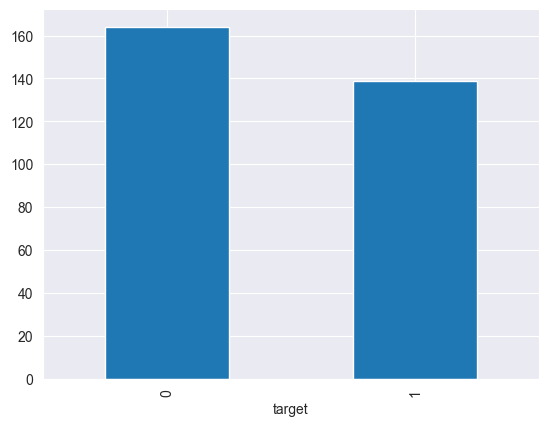

In [65]:
df.target.value_counts().plot(kind="bar");

## Boxplots for numerical values

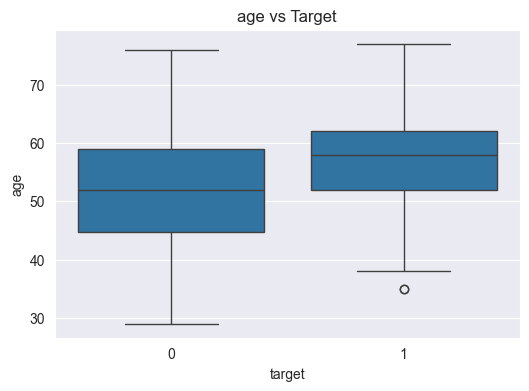

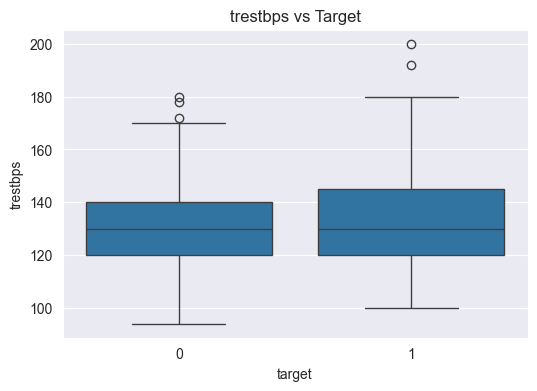

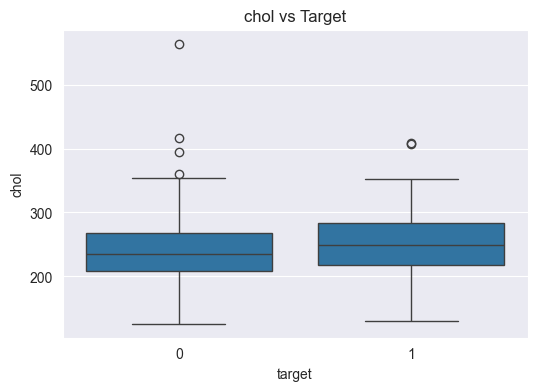

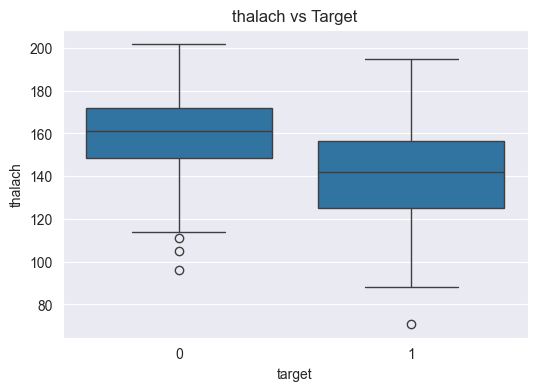

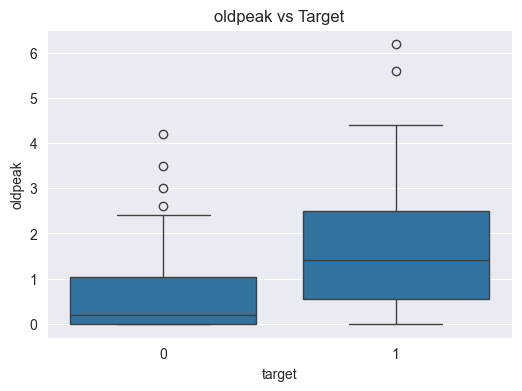

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
    plt.show()


The boxplots compare numeric variables to the target variable. The median differences between **age**, **thalach** and **oldpeak** and the target show that these features are the most important numeric predictors. In conclusion, older patient have higher risk of having CAD. Patients who achieve a lower max heart rate during exercise are more likely to have the disease. A higher oldpeak reflects abnormal heart response during exercise which is a strong sign of CAD. These three features show strong class separation. They are likely to be highly predictive in the machine learning model.

## Bar charts for categorical features and numerical(discrete)

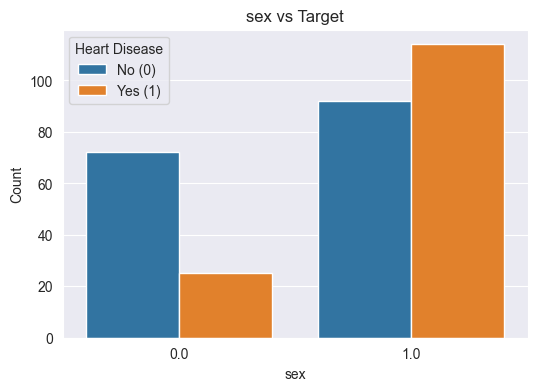

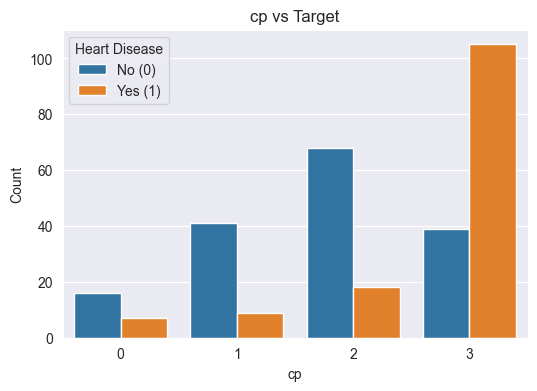

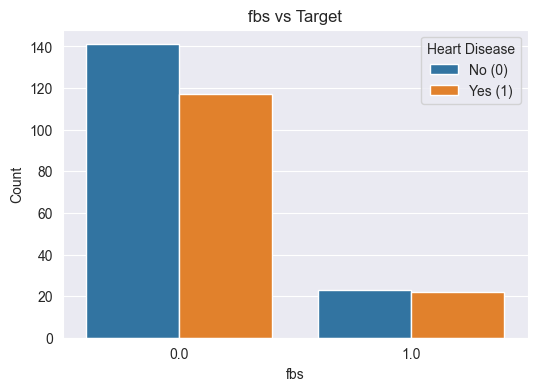

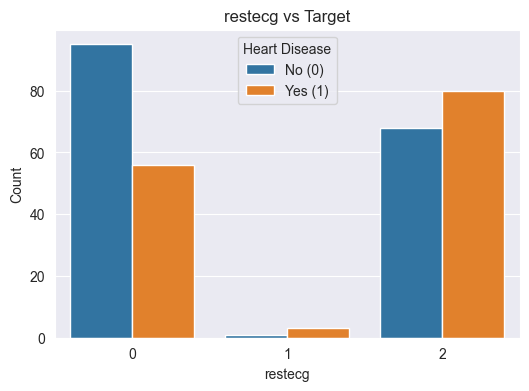

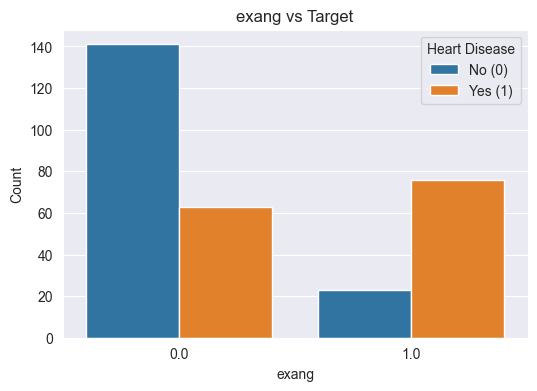

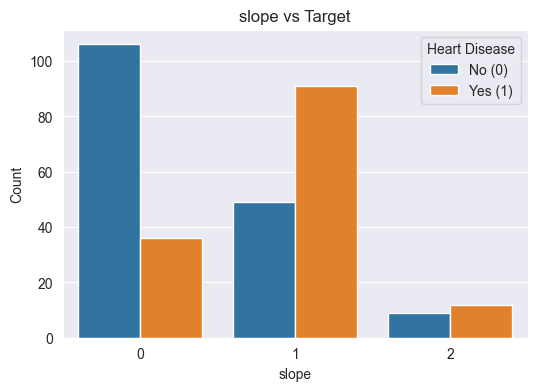

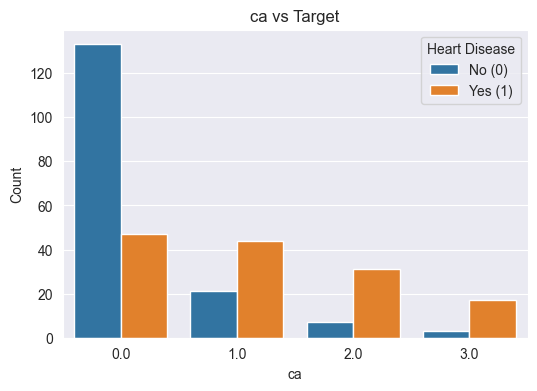

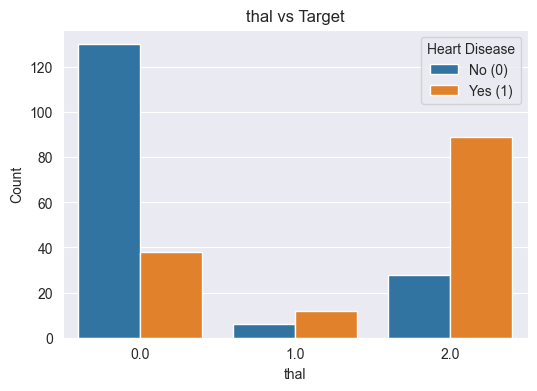

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='target')
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
    plt.show()


Chest pain is one of the most important predictors with type 3 being strongly associated with heart disease. Sex is also important because men are more likely to have CAD than women. The slope is another key indicator because patients with a flat slope (value 1) are more likely to have heart disease, while those with an upsloping slope (value 0) are less likely. The number of major vessels (ca) also shows a clear pattern: having zero visible vessels is linked to low risk, while having one or more vessels is associated with a higher risk. Similarly, the thalassemia result (thal) is very predictive: a normal result (0) indicates lower risk, whereas fixed (1) or reversible defects (2) are linked to a much higher risk of heart disease.

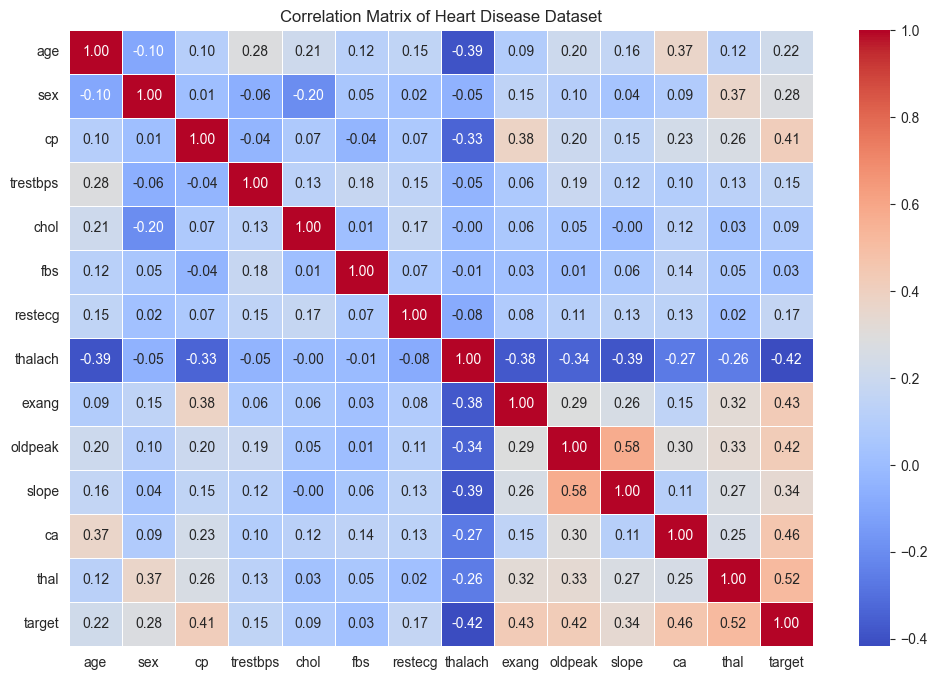

In [67]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.show()


The correlation matrix confirms that the most important features for predicting CAD are thal, ca, cp, oldpeak, exang, thalach. These features have the strongest positive or negative relationship with the target variable. Slope, sex and age have moderate predictive power, while chol, fbs, restecg and trestbps show weak correlations.

## Feature selection


In [68]:
features = ["age", "thalach", "oldpeak", "exang", "sex", "cp", "slope", "ca", "thal"]
target = "target"

X = df[features].copy()
y = df[target].copy()


## Splitting into train/test set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set and", len(X_test), "in the test set.")

There are in total 303 observations, of which 242 are now in the train set and 61 in the test set.


## Scaling

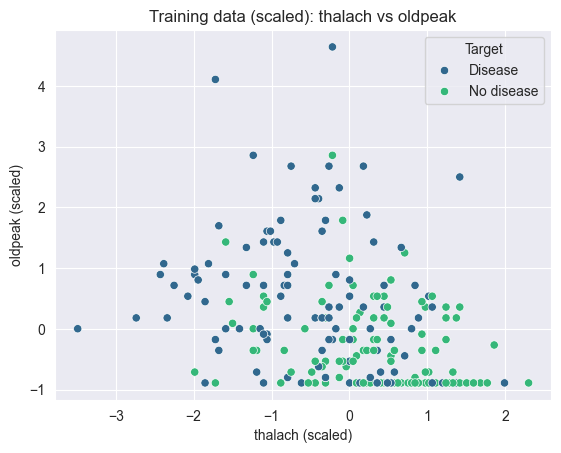

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

viz_cols = ['thalach', 'oldpeak']
scaler_viz = StandardScaler().fit(X_train[viz_cols])
X_train_viz = scaler_viz.transform(X_train[viz_cols])

sns.scatterplot(
    x=X_train_viz[:, 0],
    y=X_train_viz[:, 1],
    hue=(y_train.map({0:'No disease', 1:'Disease'}) if y_train.nunique()==2 else y_train),
    palette="viridis"
)
plt.xlabel(viz_cols[0] + " (scaled)")
plt.ylabel(viz_cols[1] + " (scaled)")
plt.title("Training data (scaled): " + viz_cols[0] + " vs " + viz_cols[1])
plt.legend(title="Target")
plt.show()

The conclusion from this plot is there is strong overlap in the middle so these two features by themselves are not enough to separate the classes, so in the modelling I will also include the categorical features. High thalach is a sign of no disease, while higher oldpeak shows disease.

## Modeling


In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

num_cols = ['age','thalach','oldpeak']
cat_cols = ['sex','cp','slope','ca','thal','exang']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), cat_cols),
])

model = Pipeline([
    ('prep', preprocess),
    ('clf', KNeighborsClassifier(n_neighbors=10, weights='distance', p=2)),
])

model.fit(X_train, y_train)

# Predict
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))



Accuracy: 0.9180327868852459


## How the encoded data looks

In [94]:
preprocess_fitted = model.named_steps['prep']

X_train_transformed = preprocess_fitted.transform(X_train)

if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()

encoded_feature_names = preprocess_fitted.named_transformers_['cat'].get_feature_names_out(cat_cols)

all_feature_names = num_cols + list(encoded_feature_names)

df_encoded = pd.DataFrame(X_train_transformed, columns=all_feature_names)
print(df_encoded.head())

        age   thalach   oldpeak  sex_1.0  cp_0  cp_1  cp_2  cp_3  slope_0  \
0 -0.729485  0.708371 -0.445445      1.0   0.0   0.0   0.0   1.0      0.0   
1  0.050166  0.222495 -0.891627      1.0   0.0   1.0   0.0   0.0      1.0   
2 -0.061212  0.399178 -0.891627      0.0   0.0   1.0   0.0   0.0      1.0   
3 -0.061212  0.266666 -0.891627      1.0   0.0   1.0   0.0   0.0      1.0   
4  0.272924 -1.190962 -0.713154      0.0   0.0   0.0   0.0   1.0      0.0   

   slope_1  slope_2  ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_0.0  thal_1.0  \
0      1.0      0.0     1.0     0.0     0.0     0.0       0.0       0.0   
1      0.0      0.0     1.0     0.0     0.0     0.0       1.0       0.0   
2      0.0      0.0     0.0     1.0     0.0     0.0       1.0       0.0   
3      0.0      0.0     1.0     0.0     0.0     0.0       0.0       0.0   
4      1.0      0.0     1.0     0.0     0.0     0.0       0.0       0.0   

   thal_2.0  exang_1.0  
0       1.0        0.0  
1       0.0        0.0  
2       0.0

## Evaluation


In [95]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)

pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("Precision:", round(precision_score(y_test, pred, zero_division=0), 3))
print("Recall:", round(recall_score(y_test, pred, zero_division=0), 3))
print("F1:", round(f1_score(y_test, pred, zero_division=0), 3))

print("\nClassification report:\n")
print(classification_report(
    y_test, pred,
    labels=[0, 1],
    target_names=["No disease", "Disease"],
    digits=3,
    zero_division=0
))


Accuracy: 0.918
Precision: 0.897
Recall: 0.929
F1: 0.912

Classification report:

              precision    recall  f1-score   support

  No disease      0.938     0.909     0.923        33
     Disease      0.897     0.929     0.912        28

    accuracy                          0.918        61
   macro avg      0.917     0.919     0.918        61
weighted avg      0.919     0.918     0.918        61



## Inference example


In [102]:
import pandas as pd

selected = ["age","thalach","oldpeak","sex","cp","slope","ca","thal","exang"]

patient = {
    "age": 22,
    "thalach": 132,
    "oldpeak": 1.4,
    "sex": 1,
    "cp": 3,
    "slope": 0,
    "ca": 0,
    "thal": 0,
    "exang": 0
}

X_inf = pd.DataFrame([patient], columns=selected)

X_inf = X_inf[X_train.columns]

X_inf = X_inf.astype(X_train.dtypes.to_dict())

num_cols = ['age','thalach','oldpeak']
X_inf[num_cols] = X_inf[num_cols].apply(pd.to_numeric, errors='raise')

proba = model.predict_proba(X_inf)[0, 1]
pred = int(proba >= 0.5)

print(f"Probability of Disease: {proba:.3f}")
print(f"Predicted class: {pred}, The patient {'disease' if pred==1 else 'no disease'}")


Probability of Disease: 0.405
Predicted class: 0, The patient no disease


In [101]:
import pandas as pd

selected = ["age","thalach","oldpeak","sex","cp","slope","ca","thal","exang"]

patient = {
    "age": 67,
    "thalach": 105,
    "oldpeak": 3.2,
    "sex": 1,
    "cp": 2,
    "slope": 2,
    "ca": 2,
    "thal": 2,
    "exang": 1
}

X_inf = pd.DataFrame([patient], columns=selected)

X_inf = X_inf[X_train.columns]

X_inf = X_inf.astype(X_train.dtypes.to_dict())

num_cols = ['age','thalach','oldpeak']
X_inf[num_cols] = X_inf[num_cols].apply(pd.to_numeric, errors='raise')

proba = model.predict_proba(X_inf)[0, 1]
pred = int(proba >= 0.5)

print(f"Probability of Disease: {proba:.3f}")
print(f"Predicted class: {pred}, The patient has {'disease' if pred==1 else 'no disease'}")


Probability of Disease: 1.000
Predicted class: 1, The patient has disease
